<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/Vis%C3%A3o%20Computacional/Aula%2001%20-%20Vis%C3%A3o%20Computacional%20e%20Processamento%20de%20Imagens/Aula_01_Segmeta%C3%A7%C3%A3o_por_Cor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb
import numpy as np

In [2]:
!wget https://github.com/andrehochuli/teaching/raw/main/Vis%C3%A3o%20Computacional/Aula%2001%20-%20Vis%C3%A3o%20Computacional%20e%20Processamento%20de%20Imagens/Images/nemo.png -O nemo.png

--2022-09-17 03:16:48--  https://github.com/andrehochuli/teaching/raw/main/Vis%C3%A3o%20Computacional/Aula%2001%20-%20Vis%C3%A3o%20Computacional%20e%20Processamento%20de%20Imagens/Images/nemo.png
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/andrehochuli/teaching/main/Vis%C3%A3o%20Computacional/Aula%2001%20-%20Vis%C3%A3o%20Computacional%20e%20Processamento%20de%20Imagens/Images/nemo.png [following]
--2022-09-17 03:16:48--  https://raw.githubusercontent.com/andrehochuli/teaching/main/Vis%C3%A3o%20Computacional/Aula%2001%20-%20Vis%C3%A3o%20Computacional%20e%20Processamento%20de%20Imagens/Images/nemo.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected

#Problema: Segmentar o nemo!
* Segmentar o nemo da imagem (laranja e branco)

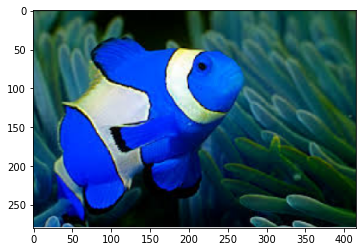

In [3]:
nemo = cv2.imread('nemo.png')
plt.imshow(nemo)
plt.show()

Obviamente, o nemo não é azul. Isso ocorre porque a OpenCV interpreta as imagens em BGR. A correção é simples, convertemos de BGR->RGB

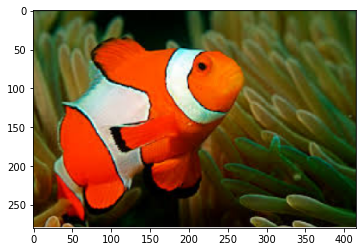

In [4]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

#Distribuição no Espaço RGB

Por ser um sistema de cor por adição, a segmentação da cor laranja ou branca não é evidente, visto que é resultante de porções de R,G,B

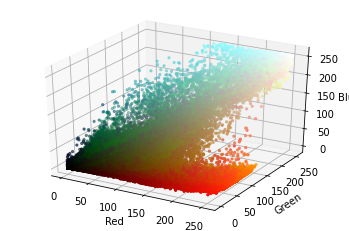

In [5]:
r, g, b = cv2.split(nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

#Distribuição no Espaço HSV
Por ser um sistema baseado na matiz da cor (hue), saturação e intesidade (value), a segmentação é mais facil neste caso. 
 
Veja que, apesar do laranja apresentar saturação e intensides variadas, a matiz (hue) é bem concentrada.



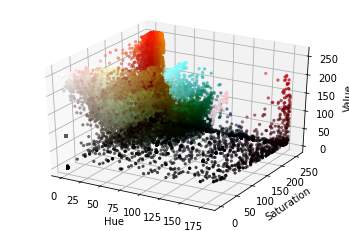

In [6]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

#Segmentação em HSV

Analisando o gráfico anterior, definimos os  parâmetros para filtrar a cor.

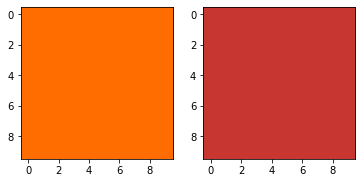

In [7]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

Agora aplicamos uma função da opencv (inRange) que filtra uma determinada faixa de valores, de acordo com cada canal. Você pode tentar implementar por conta própria se quiser. É um ótimo exercício.

Sobre a mascará resultante (0 e 1), aplicamos sobre a imagem original e....voilá...temos os tons de laranja do nemo!

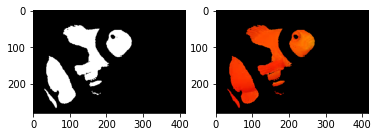

In [8]:
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)
result = cv2.bitwise_and(nemo, nemo, mask=mask)

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

Agora repetimos o processo para as outras partes dele (tons de branco e azul)

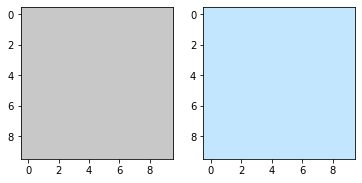

In [9]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)
lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0


plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()

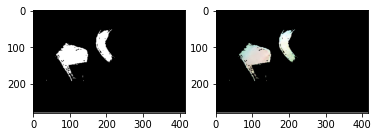

In [10]:
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

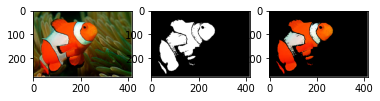

In [11]:
final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)


plt.subplot(1, 3, 1)
plt.imshow(nemo, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(final_result)
plt.show()

#Exercício 01: Segmente o tomate!

Seguindo o exposto até agora, apresente uma solução para segmentar o tomate!

A lógica é a mesma, você so deve achar a faixa correta dos tons de vermelho no espaço HSV!


  

--2022-09-17 03:17:00--  https://cdn.pixabay.com/photo/2018/08/18/15/39/tomato-3614967_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.37.244, 172.64.150.12, 2606:4700:4400::6812:25f4, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.37.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190464 (186K) [image/jpeg]
Saving to: ‘salad.png’

salad.png           100%[===================>] 186.00K  --.-KB/s    in 0.004s  

2022-09-17 03:17:00 (43.7 MB/s) - ‘salad.png’ saved [190464/190464]



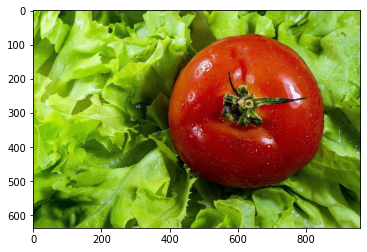

In [12]:
!wget https://cdn.pixabay.com/photo/2018/08/18/15/39/tomato-3614967_960_720.jpg -O salad.png 

im_salad = cv2.imread('salad.png', cv2.IMREAD_COLOR)
im_salad = cv2.cvtColor(im_salad, cv2.COLOR_BGR2RGB)

plt.imshow(im_salad)
plt.show()